In [1]:
from dask.distributed import Client

client = Client("tcp://10.32.2.242:42493")
client

Client Scheduler: tcp://10.32.2.242:42493 Dashboard: /user/0000-0002-8176-9465/proxy/8787/status,Cluster Workers: 30 Cores: 60 Memory: 345.00 GB


# For SOSE

In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
%matplotlib inline

# Validating Heat Budget (w zarr ds)

In [3]:
ds_tmp = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/budget_th.zarr'))
ds_tmp

<xarray.Dataset>
Dimensions:                  (XC: 2160, YC: 320, Z: 42, time: 438)
Coordinates:
  * XC                       (XC) float32 0.083333336 0.25 ... 359.75 359.9167
  * YC                       (YC) float32 -77.87497 -77.7083 ... -24.7083
  * Z                        (Z) float32 -5.0 -15.5 -27.0 ... -5325.0 -5575.0
  * time                     (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    conv_horiz_adv_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 319, 2159), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 319, 2159), meta=np.ndarray>
    conv_vert_adv_flux_TH    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 41, 320, 2160), meta=np.ndarray>
    conv_vert_diff_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 41, 320, 2160), meta=np.ndarray>
    total_tendency_TH_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>

In [4]:
ds_tmp_surf_terms = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/budget_surf_th.zarr'))
ds_tmp_surf_terms

<xarray.Dataset>
Dimensions:               (XC: 2160, YC: 320, Z: 42, time: 438)
Coordinates:
  * XC                    (XC) float32 0.083333336 0.25 ... 359.75 359.9167
  * YC                    (YC) float32 -77.87497 -77.7083 ... -24.7083
  * Z                     (Z) float32 -5.0 -15.5 -27.0 ... -5325.0 -5575.0
  * time                  (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    lin_fs_correction_TH  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    surface_flux_conv_TH  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    sw_flux_conv_TH       (time, YC, XC, Z) float32 dask.array<chunksize=(1, 320, 2160, 41), meta=np.ndarray>

In [5]:
dsr_tmp = xr.merge([ds_tmp, ds_tmp_surf_terms])
dsr_tmp

<xarray.Dataset>
Dimensions:                  (XC: 2160, YC: 320, Z: 42, time: 438)
Coordinates:
  * XC                       (XC) float32 0.083333336 0.25 ... 359.75 359.9167
  * YC                       (YC) float32 -77.87497 -77.7083 ... -24.7083
  * Z                        (Z) float32 -5.0 -15.5 -27.0 ... -5325.0 -5575.0
  * time                     (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    conv_horiz_adv_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 319, 2159), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 319, 2159), meta=np.ndarray>
    conv_vert_adv_flux_TH    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 41, 320, 2160), meta=np.ndarray>
    conv_vert_diff_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 41, 320, 2160), meta=np.ndarray>
    total_tendency_TH_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    lin_fs_correction_TH     (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    surface_flux_conv_TH     (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    sw_flux_conv_TH          (time, YC, XC, Z) float32 dask.array<chunksize=(1, 320, 2160, 41), meta=np.ndarray>

### Entire WG column budget

In [6]:
lower_lat = 0
upper_lat = 78
left_lon = 1788
right_lon = 2159

In [7]:
#set the boundaries
lat_range = dict(YC=slice(lower_lat, upper_lat))
lon_range = dict(XC=slice(left_lon, right_lon))

In [8]:
ds_tmp_wg = dsr_tmp.isel(**lat_range, **lon_range)
ds_tmp_wg

<xarray.Dataset>
Dimensions:                  (XC: 371, YC: 78, Z: 42, time: 438)
Coordinates:
  * XC                       (XC) float32 298.08334 298.25 ... 359.58334 359.75
  * YC                       (YC) float32 -77.87497 -77.7083 ... -65.04163
  * Z                        (Z) float32 -5.0 -15.5 -27.0 ... -5325.0 -5575.0
  * time                     (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    conv_horiz_adv_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    conv_vert_adv_flux_TH    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 41, 78, 371), meta=np.ndarray>
    conv_vert_diff_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 41, 78, 371), meta=np.ndarray>
    total_tendency_TH_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    lin_fs_correction_TH     (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>
    surface_flux_conv_TH     (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>
    sw_flux_conv_TH          (time, YC, XC, Z) float32 dask.array<chunksize=(1, 78, 371, 41), meta=np.ndarray>

# NOTE:
**closed interior without sw term. Can't seem to close entire water column though...**
I most likely has something to do with how Ryan defined the `surf_flux_th` and `surf_flux_th_sw` terms. How to include those...

In [11]:
horiz = (ds_tmp_wg.conv_horiz_adv_flux_TH + 
         ds_tmp_wg.conv_horiz_diff_flux_TH).sum(dim=['XC', 'YC', 'Z'])
surf = (ds_tmp_wg.sw_flux_conv_TH.sum(dim=['XC', 'YC', 'Z']) +
      (ds_tmp_wg.lin_fs_correction_TH + 
       ds_tmp_wg.surface_flux_conv_TH).sum(dim=['XC', 'YC']))

rhs_heat = (horiz + surf).load()

In [12]:
lhs_heat = ds_tmp_wg.total_tendency_TH_truth.sum(dim=['XC', 'YC', 'Z']).load()

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


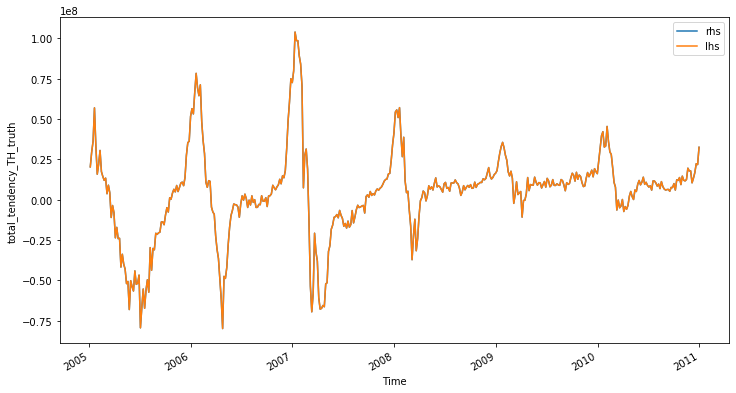

In [13]:
plt.figure(figsize=(12,6))
rhs_heat.plot(label='rhs')
lhs_heat.plot(label='lhs')
plt.legend();

### What I've tried:
1. Tried to match each individual term with the heat budget I closed (adv, diff, lin_fs_correction, surface)
2. Noticed surface plots didn't match so I added `sw` term to the surface term...that made it a little better but the plot was still off...
3. The SOSE-heat-budget `surface_term` only considered `ds.TFLUX`. This nb's ds considered `TFLUX` and `sw` separately.
4. So uploaded ryan's `sw` and tried it and it closed! So my question is: **why does the budget close when I consider only `TFLUX`, but when subtracting `oceQsw` it won't close when I want to add it back**?

### Interior WG column budget

In [14]:
#index locations corresponding to above lat/lon coordinates
lower_lat_lower = 0
upper_lat_lower = 71
left_lon_lower = 1794
right_lon_lower = 2159

lower_cell_range = dict(Zl=[27, 42])
lower_cell_range_z = dict(Z=slice(27, 42))

In [15]:
#set the boundaries
lat_range_lower = dict(YC=slice(lower_lat_lower, upper_lat_lower))
lon_range_lower = dict(XC=slice(left_lon_lower, right_lon_lower))

In [16]:
ds_tmp_wg_lower = dsr_tmp.isel(**lat_range_lower, **lon_range_lower, **lower_cell_range_z)
ds_tmp_wg_lower

<xarray.Dataset>
Dimensions:                  (XC: 365, YC: 71, Z: 15, time: 438)
Coordinates:
  * XC                       (XC) float32 299.08334 299.25 ... 359.58334 359.75
  * YC                       (YC) float32 -77.87497 -77.7083 ... -66.2083
  * Z                        (Z) float32 -2046.0 -2319.0 ... -5325.0 -5575.0
  * time                     (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    conv_horiz_adv_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 15, 71, 365), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 15, 71, 365), meta=np.ndarray>
    conv_vert_adv_flux_TH    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 14, 71, 365), meta=np.ndarray>
    conv_vert_diff_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 14, 71, 365), meta=np.ndarray>
    total_tendency_TH_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 15, 71, 365), meta=np.ndarray>
    lin_fs_correction_TH     (time, YC, XC) float32 dask.array<chunksize=(1, 71, 365), meta=np.ndarray>
    surface_flux_conv_TH     (time, YC, XC) float32 dask.array<chunksize=(1, 71, 365), meta=np.ndarray>
    sw_flux_conv_TH          (time, YC, XC, Z) float32 dask.array<chunksize=(1, 71, 365, 14), meta=np.ndarray>

# NOTE:
**if I don't consider sw, then my budget closes - how to close budget w sw term?**

In [17]:
rhs_heat_lower = ((ds_tmp_wg_lower.conv_horiz_adv_flux_TH + 
                  ds_tmp_wg_lower.conv_horiz_diff_flux_TH + 
                  ds_tmp_wg_lower.conv_vert_adv_flux_TH +
                  ds_tmp_wg_lower.conv_vert_diff_flux_TH).sum(dim=['XC', 'YC', 'Z'])).load()
                  #ds_tmp_wg_lower.sw_flux_conv_TH.sum(dim=['XC', 'YC', 'Zl'])).load()
lhs_heat_lower = ds_tmp_wg_lower.total_tendency_TH_truth.sum(dim=['XC', 'YC', 'Z']).load()

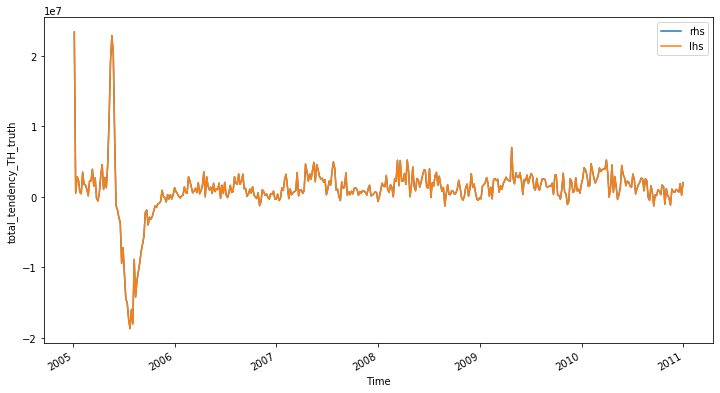

In [18]:
plt.figure(figsize=(12,6))
rhs_heat_lower.plot(label='rhs')
lhs_heat_lower.plot(label='lhs')
plt.legend();

# Validating Salt Budget (w zarr ds)

In [19]:
ds = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/budget_slt.zarr'))
ds

<xarray.Dataset>
Dimensions:                   (XC: 2160, YC: 320, Z: 42, time: 438)
Coordinates:
  * XC                        (XC) float32 0.083333336 0.25 ... 359.75 359.9167
  * YC                        (YC) float32 -77.87497 -77.7083 ... -24.7083
  * Z                         (Z) float32 -5.0 -15.5 -27.0 ... -5325.0 -5575.0
  * time                      (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    conv_horiz_adv_flux_SLT   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 319, 2159), meta=np.ndarray>
    conv_horiz_diff_flux_SLT  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 319, 2159), meta=np.ndarray>
    conv_vert_adv_flux_SLT    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 41, 320, 2160), meta=np.ndarray>
    conv_vert_diff_flux_SLT   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 41, 320, 2160), meta=np.ndarray>
    total_tendency_SLT_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>

In [20]:
ds_surf_terms = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/budget_surf_slt.zarr'))
ds_surf_terms

<xarray.Dataset>
Dimensions:                (XC: 2160, YC: 320, time: 438)
Coordinates:
  * XC                     (XC) float32 0.083333336 0.25 ... 359.75 359.9167
  * YC                     (YC) float32 -77.87497 -77.7083 ... -24.7083
  * time                   (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    lin_fs_correction_SLT  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    surface_flux_conv_SLT  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>

In [21]:
dsr = xr.merge([ds, ds_surf_terms])
dsr

<xarray.Dataset>
Dimensions:                   (XC: 2160, YC: 320, Z: 42, time: 438)
Coordinates:
  * XC                        (XC) float32 0.083333336 0.25 ... 359.75 359.9167
  * YC                        (YC) float32 -77.87497 -77.7083 ... -24.7083
  * Z                         (Z) float32 -5.0 -15.5 -27.0 ... -5325.0 -5575.0
  * time                      (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    conv_horiz_adv_flux_SLT   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 319, 2159), meta=np.ndarray>
    conv_horiz_diff_flux_SLT  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 319, 2159), meta=np.ndarray>
    conv_vert_adv_flux_SLT    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 41, 320, 2160), meta=np.ndarray>
    conv_vert_diff_flux_SLT   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 41, 320, 2160), meta=np.ndarray>
    total_tendency_SLT_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    lin_fs_correction_SLT     (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    surface_flux_conv_SLT     (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>

### Entire WG column budget

In [22]:
lower_lat = 0
upper_lat = 78
left_lon = 1788
right_lon = 2159

In [23]:
#set the boundaries
lat_range = dict(YC=slice(lower_lat, upper_lat))
lon_range = dict(XC=slice(left_lon, right_lon))

In [24]:
ds_wg = dsr.isel(**lat_range, **lon_range)
ds_wg

<xarray.Dataset>
Dimensions:                   (XC: 371, YC: 78, Z: 42, time: 438)
Coordinates:
  * XC                        (XC) float32 298.08334 298.25 ... 359.58334 359.75
  * YC                        (YC) float32 -77.87497 -77.7083 ... -65.04163
  * Z                         (Z) float32 -5.0 -15.5 -27.0 ... -5325.0 -5575.0
  * time                      (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    conv_horiz_adv_flux_SLT   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    conv_horiz_diff_flux_SLT  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    conv_vert_adv_flux_SLT    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 41, 78, 371), meta=np.ndarray>
    conv_vert_diff_flux_SLT   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 41, 78, 371), meta=np.ndarray>
    total_tendency_SLT_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 78, 371), meta=np.ndarray>
    lin_fs_correction_SLT     (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>
    surface_flux_conv_SLT     (time, YC, XC) float32 dask.array<chunksize=(1, 78, 371), meta=np.ndarray>

**Errors & Corrections:**
- corrected boundaries so that comparison with old salt budget could be accurate
- realized I shouldn't be including vertical terms for entire water column
- compared each term's plot with old salt budget (they all matched)
- what finally worked was the fact that I can't sum over 'Z' dimension for the surface terms... why is that? - because when I did that the plot didn't math lhs.

In [25]:
rhs_slt = ((ds_wg.conv_horiz_adv_flux_SLT + 
           ds_wg.conv_horiz_diff_flux_SLT).sum(dim=['XC', 'YC', 'Z']) +
           (ds_wg.lin_fs_correction_SLT + 
           ds_wg.surface_flux_conv_SLT).sum(dim=['XC', 'YC'])).load()

In [26]:
lhs_slt = ds_wg.total_tendency_SLT_truth.sum(dim=['XC', 'YC', 'Z']).load()

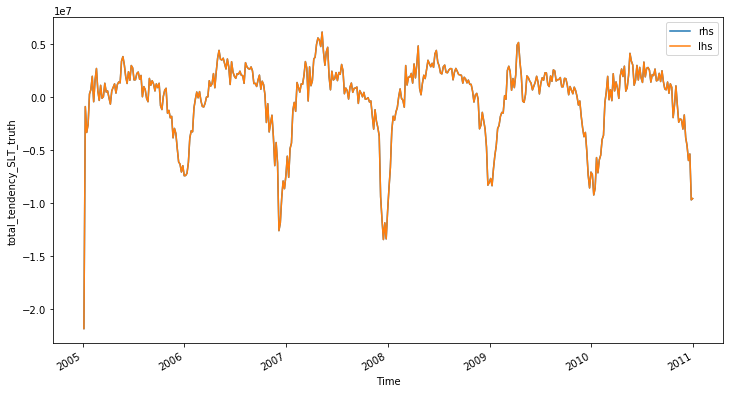

In [27]:
plt.figure(figsize=(12,6))
rhs_slt.plot(label='rhs')
lhs_slt.plot(label='lhs')
plt.legend();

### Interior WG column budget

In [28]:
#index locations corresponding to above lat/lon coordinates
lower_lat_lower = 0
upper_lat_lower = 71
left_lon_lower = 1794
right_lon_lower = 2159

lower_cell_range = dict(Zl=[27, 42])
lower_cell_range_z = dict(Z=slice(27, 42))

In [29]:
#set the boundaries
lat_range_lower = dict(YC=slice(lower_lat_lower, upper_lat_lower))
lon_range_lower = dict(XC=slice(left_lon_lower, right_lon_lower))

In [30]:
ds_wg_lower = dsr.isel(**lat_range_lower, **lon_range_lower, **lower_cell_range_z)
ds_wg_lower

<xarray.Dataset>
Dimensions:                   (XC: 365, YC: 71, Z: 15, time: 438)
Coordinates:
  * XC                        (XC) float32 299.08334 299.25 ... 359.58334 359.75
  * YC                        (YC) float32 -77.87497 -77.7083 ... -66.2083
  * Z                         (Z) float32 -2046.0 -2319.0 ... -5325.0 -5575.0
  * time                      (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    conv_horiz_adv_flux_SLT   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 15, 71, 365), meta=np.ndarray>
    conv_horiz_diff_flux_SLT  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 15, 71, 365), meta=np.ndarray>
    conv_vert_adv_flux_SLT    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 14, 71, 365), meta=np.ndarray>
    conv_vert_diff_flux_SLT   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 14, 71, 365), meta=np.ndarray>
    total_tendency_SLT_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 15, 71, 365), meta=np.ndarray>
    lin_fs_correction_SLT     (time, YC, XC) float32 dask.array<chunksize=(1, 71, 365), meta=np.ndarray>
    surface_flux_conv_SLT     (time, YC, XC) float32 dask.array<chunksize=(1, 71, 365), meta=np.ndarray>

In [31]:
rhs_slt_lower = (ds_wg_lower.conv_horiz_adv_flux_SLT + 
                 ds_wg_lower.conv_horiz_diff_flux_SLT + 
                 ds_wg_lower.conv_vert_adv_flux_SLT +
                 ds_wg_lower.conv_vert_diff_flux_SLT).sum(dim=['XC', 'YC', 'Z']).load()
lhs_slt_lower = ds_wg_lower.total_tendency_SLT_truth.sum(dim=['XC', 'YC', 'Z']).load()

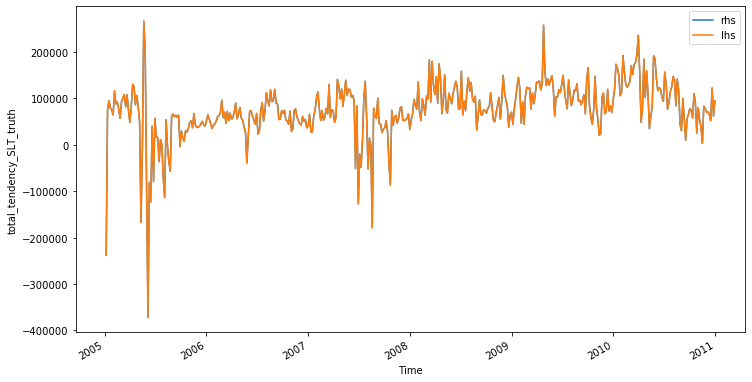

In [32]:
plt.figure(figsize=(12,6))
rhs_slt_lower.plot(label='rhs')
lhs_slt_lower.plot(label='lhs')
plt.legend();